In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
%matplotlib inline 
import matplotlib.pyplot as plt

In [100]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
real_est = pd.read_csv('Ames Real Estate Data.csv')

housingdf = housing.copy()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Cleaning X_train

## Seperating Quantative and Qualitative data

strings are object datatype so we filter columns by this

In [101]:
quant = [col for col in housingdf.columns if housingdf.dtypes[col] != 'object']
qual = [col for col in housingdf.columns if housingdf.dtypes[col] == 'object']

## Imputing Missing Data (_Quantitative_)

fill missing data with 0s

In [102]:
housingdf[quant].isna().mean().nlargest(8).round(4) * 100

LotFrontage     17.91
GarageYrBlt      5.00
MasVnrArea       0.54
BsmtFullBath     0.08
BsmtHalfBath     0.08
BsmtFinSF1       0.04
BsmtFinSF2       0.04
BsmtUnfSF        0.04
dtype: float64

In [103]:
housingdf[quant] = housingdf.loc[:, quant].fillna(value=0)

In [104]:
housingdf[quant].isna().mean().nlargest(8).round(4) * 100

PID            0.0
GrLivArea      0.0
SalePrice      0.0
MSSubClass     0.0
LotFrontage    0.0
LotArea        0.0
OverallQual    0.0
OverallCond    0.0
dtype: float64

## Imputing Missing Data (_Qualitative_)

dealing with missing data and dummifying

In [105]:
housingdf[qual].isna().mean().nlargest(8).round(4) * 100

PoolQC          99.65
MiscFeature     96.24
Alley           93.49
Fence           79.65
FireplaceQu     48.10
GarageFinish     5.00
GarageQual       5.00
GarageCond       5.00
dtype: float64

dropping PoolQC, MiscFeature, Alley, Fence since missing lots of data

In [106]:
housingdf.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

removing removed features from qual list

In [107]:
ew = ['PoolQC','MiscFeature','Alley','Fence']
qual = [q for q in qual if q not in ew]

adding missing category for any nan values in qual columns

In [108]:
for col in qual:
    housingdf[col] = housingdf[col].astype('category')
    if housingdf[col].isnull().any:
        housingdf[col] = housingdf[col].cat.add_categories(['MISSING'])
        housingdf[col] = housingdf[col].fillna('MISSING')

In [109]:
housingdf[qual].isna().mean().nlargest(10)

MSZoning        0.0
Street          0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
dtype: float64

In [110]:
h_quant = housingdf.loc[:, quant]

In [111]:
h_quant

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,0.0,7890,6,6,1939,1950,...,399.0,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,...,266.0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,...,216.0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,80.0,8146,4,8,1900,2003,...,281.0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,70.0,8400,8,6,2001,2001,...,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,0.0,8854,6,6,1916,1950,...,192.0,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,0.0,13680,3,5,1955,1955,...,452.0,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,82.0,6270,5,6,1949,1950,...,871.0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,0.0,8826,7,5,2000,2000,...,486.0,193,96,0,0,0,0,0,7,2007


### Dummifying

In [112]:
qual

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [113]:
qualdf = housingdf.loc[:, qual]
#print(pd.get_dummies(, prefix=['column1', 'column2']))

In [115]:
dummydf = pd.get_dummies(qualdf, drop_first=True)

In [116]:
newhousing = pd.concat([h_quant,dummydf],axis=1)

In [117]:
newhousing

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleType_MISSING,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_MISSING
1,909176150,856,126000,30,0.0,7890,6,6,1939,1950,...,0,0,1,0,0,0,0,1,0,0
2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,...,0,0,1,0,0,0,0,1,0,0
3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,...,0,0,1,0,0,0,0,1,0,0
4,535377150,1039,114000,70,80.0,8146,4,8,1900,2003,...,0,0,1,0,0,0,0,1,0,0
5,534177230,1665,227000,60,70.0,8400,8,6,2001,2001,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,0.0,8854,6,6,1916,1950,...,0,0,1,0,0,0,0,1,0,0
760,905402060,1733,139600,20,0.0,13680,3,5,1955,1955,...,0,0,1,0,0,0,0,1,0,0
761,909275030,2002,145000,90,82.0,6270,5,6,1949,1950,...,0,0,1,0,0,0,0,1,0,0
762,907192040,1842,217500,60,0.0,8826,7,5,2000,2000,...,0,0,1,0,0,0,0,1,0,0


In [170]:
newhousing['OverallQual'].unique()

array([ 6,  5,  4,  8,  7,  3, 10,  9,  2,  1], dtype=int64)

In [172]:
housing.OverallQual.unique()

array([ 6,  5,  4,  8,  7,  3, 10,  9,  2,  1], dtype=int64)

### Feature Engineering

In [118]:
newhousing['Baths'] = newhousing['BsmtFullBath'] + (newhousing['BsmtHalfBath']/2) + newhousing['FullBath']+ (newhousing['HalfBath']/2)

In [119]:
newhousing.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis=1,inplace=True)

---

## CSVs

In [120]:
newhousing.to_csv('newhousing.csv',index=False)

In [173]:
dummydf.to_csv('dummyvars.csv', index=False)

---

## Regression Techniques

In [75]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [121]:
features = newhousing.loc[:, newhousing.columns != 'SalePrice'].columns.tolist()
X = newhousing[features]
y = newhousing['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [124]:

clf = LassoCV(normalize=True, max_iter=2000)
clf.fit(X_train,y_train)

importance = np.abs(clf.coef_)
print(importance)

[0.00000000e+00 5.54254906e+01 6.07652797e+01 8.88082666e+00
 4.50175537e-01 8.12130583e+03 5.34451228e+03 3.12690175e+02
 8.54780225e+01 2.48320867e+01 1.87343236e+01 1.33841201e+01
 0.00000000e+00 1.63353037e+01 0.00000000e+00 0.00000000e+00
 5.79501467e+00 3.59349137e+03 8.40591133e+03 0.00000000e+00
 5.13398300e+03 0.00000000e+00 3.49989018e+03 1.47487721e+01
 4.71635264e+00 0.00000000e+00 1.03003627e+01 0.00000000e+00
 4.09467056e+01 3.73377031e+00 3.22639229e-02 1.05227654e+02
 0.00000000e+00 5.15688837e+03 0.00000000e+00 2.09144860e+03
 3.09205818e+02 5.24744834e+03 0.00000000e+00 0.00000000e+00
 4.72458085e+03 0.00000000e+00 2.13197535e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.81854875e+03 0.00000000e+00
 3.56364279e+03 0.00000000e+00 3.96331181e+03 0.00000000e+00
 2.24985840e+03 3.54072865e+03 7.24160171e+03 0.00000000e+00
 0.00000000e+00 1.95069064e+03 1.83674856e+04 0.00000000e+00
 3.73863776e+03 1.73882167e+03 4.44128253e+03 0.00000000e+00
 0.00000000e+00 1.287629

In [125]:
clf.score(X_train,y_train)

0.9334723583806537

In [126]:
clf.score(X_test,y_test)

0.9171884176818813

<AxesSubplot:>

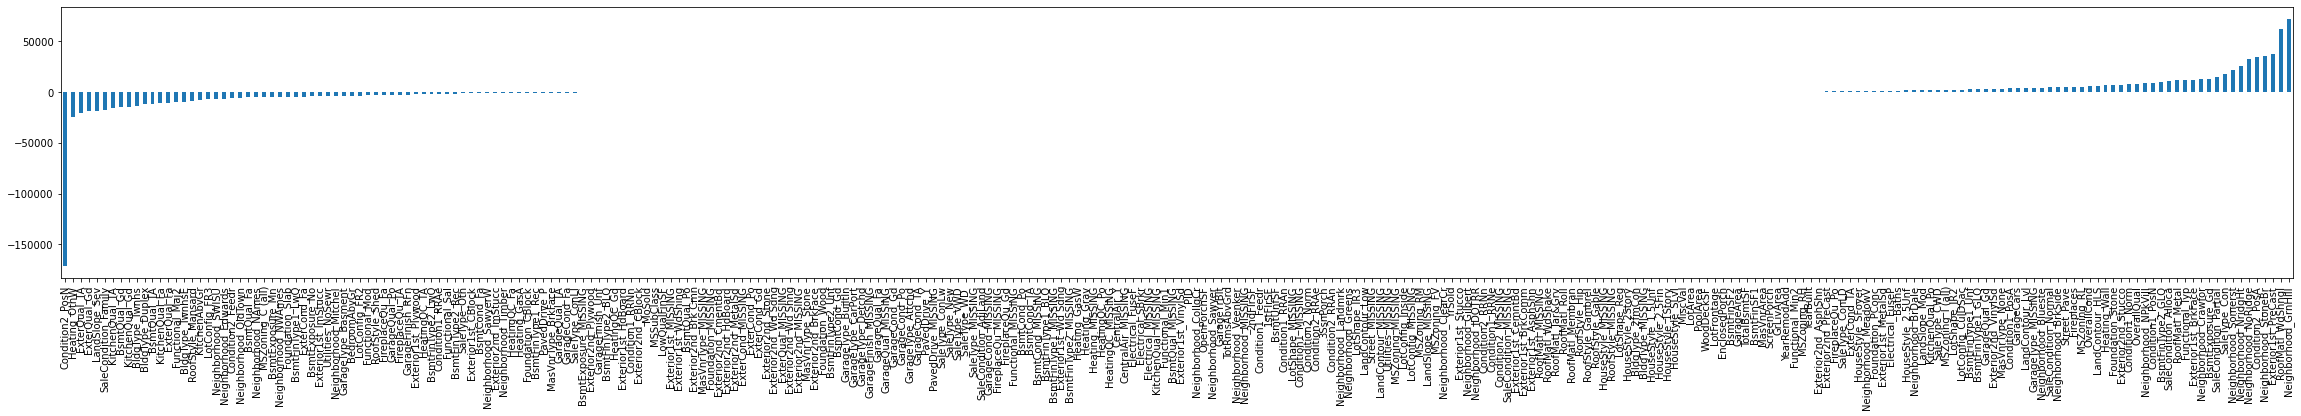

In [149]:
pd.Series(dict(zip(X_train.columns, clf.coef_))).sort_values().plot(kind='bar',figsize=(40,5))

In [140]:
pd.Series(clf.coef_<0.05)

0       True
1      False
2       True
3      False
4      False
       ...  
275     True
276    False
277    False
278     True
279    False
Length: 280, dtype: bool

In [155]:
pd.Series(X_train.columns[clf.coef_<0.05])

0                        PID
1                 MSSubClass
2                  BsmtUnfSF
3                   1stFlrSF
4                   2ndFlrSF
               ...          
199             SaleType_WD 
200         SaleType_MISSING
201    SaleCondition_AdjLand
202     SaleCondition_Family
203    SaleCondition_MISSING
Length: 204, dtype: object

In [158]:
t = pd.Series(dict(zip(X_train.columns, clf.coef_))).sort_values()


In [168]:
t[t<0]

Condition2_PosN      -171171.837013
Heating_OthW          -24501.900888
ExterQual_TA          -20374.863830
ExterQual_Gd          -19144.347145
LandSlope_Sev         -18367.485621
                          ...      
Condition1_RRNn         -241.903892
Exterior2nd_CBlock      -131.101297
MoSold                  -105.227654
MSSubClass               -60.765280
LowQualFinSF              -5.795015
Length: 76, dtype: float64

In [167]:
sigvars

[-171171.83701304605,
 -24501.900887510637,
 -20374.863829797403,
 -19144.347145451204,
 -18367.48562059202,
 -17739.249857111572,
 -15986.19693519892,
 -15121.294370334243,
 -14953.592533030736,
 -13635.6175467253,
 -11844.878472495588,
 -11806.090932985806,
 -11397.815626099135,
 -10611.7535294402,
 -10409.585149959836,
 -10088.642807559725,
 -8953.727226234276,
 -8405.91133497622,
 -7241.601714251798,
 -6955.896057800152,
 -6732.869136121543,
 -5857.775306766725,
 -5512.621236686186,
 -5479.847590091728,
 -5431.628599136269,
 -5156.888372819415,
 -4858.281706977205,
 -4711.304910672611,
 -4645.631734130867,
 -4576.303048980456,
 -4565.380630941517,
 -4361.67467641103,
 -4131.572124266368,
 -3963.3118092755476,
 -3953.803312517082,
 -3653.948610174292,
 -3593.491368854527,
 -3540.728649669901,
 -3479.159356678886,
 -2908.7496081744553,
 -2764.9759937516114,
 -2715.336831294245,
 -2686.5294851974795,
 -2679.02107509302,
 -2444.5547815154205,
 -2401.748967258873,
 -1670.034686436814,
 